# Occupancy and Price Analysis
Here we explore the booking occupancy and price fluctuation of current Airbnb rentals in Mallorca.<br />
Input data: Airbnb data of Mallorca acquired on Jun 28th 2020 (http://insideairbnb.com/get-the-data.html)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

calendar = pd.read_csv('calendar.csv')

## Data preparation: convert price from object to int64

In [3]:
# convert price to int64
def convert_price_to_number(df, column_name = 'price'):
    price_new = np.zeros(df.shape[0])
    for i in range(df.shape[0]):
        price_new[i] = int(df[column_name][i][1:-3].replace(',',''))
    df[column_name +'_new'] = price_new
    return df

calendar = convert_price_to_number(calendar, column_name = 'price')
calendar = convert_price_to_number(calendar, column_name = 'adjusted_price')

## Data Analysis

In [9]:
# generate availability and price matrix
availability = np.zeros([calendar.listing_id.unique().shape[0],365])
price = np.zeros([calendar.listing_id.unique().shape[0],365])
adjusted_price = np.zeros([calendar.listing_id.unique().shape[0],365])
for i in range(calendar.listing_id.unique().shape[0]):
    id = calendar.listing_id.unique()[i]
    if calendar[calendar.listing_id==id].date.shape[0]!=365:
        availability[i] = calendar[calendar.listing_id==id]['available'].replace({'f':1,'t':0})[1:]
        price[i] = calendar[calendar.listing_id==id]['price_new'][1:]
        adjusted_price[i] = calendar[calendar.listing_id==id]['adjusted_price_new'][1:]
    else:
        availability[i] = calendar[calendar.listing_id==id]['available'].replace({'f':1,'t':0})
        price[i] = calendar[calendar.listing_id==id]['price_new']
        adjusted_price[i] = calendar[calendar.listing_id==id]['adjusted_price_new']

In [133]:
# adjust for property with 0 as price
np.where(price==0)[0]
price[16608] = price[16608] + 0.0001

# normalize the price over time with mode 
price_norm_by_mode = (price - scipy.stats.mode(price,1)[0].flatten().repeat(365).reshape([price.shape[0],365]))/scipy.stats.mode(price,1)[0].flatten().repeat(365).reshape([price.shape[0],365])

## Data Visualization

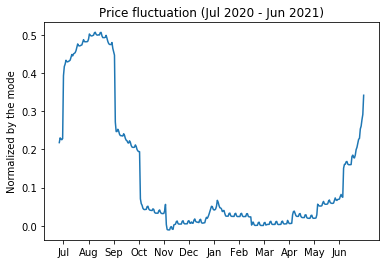

In [154]:
# visualize averaged price flucatuation 
plt.plot(price_norm_by_mode.mean(0))
plt.xticks(np.arange(5,365,30),['Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr','May','Jun'])
plt.ylabel('Normalized by the mode')
plt.title('Price fluctuation (Jul 2020 - Jun 2021)')
plt.savefig('Price_fluctuation.png')

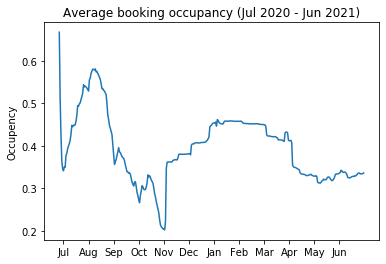

In [153]:
# visualize booking occupancy
plt.plot(availability.mean(0))
plt.xticks(np.arange(5,365,30),['Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr','May','Jun'])
plt.ylabel('Occupency')
plt.title('Average booking occupancy (Jul 2020 - Jun 2021)')
plt.savefig('Average_oppupancy.png')

Text(0.5, 0, '% of occupancy over a year')

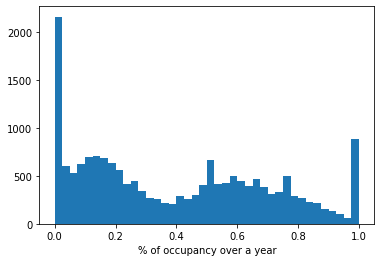

In [151]:
# visualize the distribution of occupancy for each property 
plt.hist(availability.mean(1), bins=40)
plt.xlabel('% of occupancy over a year')
plt.ylabel('Number of properties')

In [152]:
# calculate the average annual occupancy over a year
availability.mean(1).mean()

0.39424398691612117